---
title: "Linear and Nonlinear Regression: Laptop Price Prediction"
author: "Julia Chen"
date: "2023-11-29"
categories: []
image: "image.jpg"
---

For this blog post, I will be demonstrating both linear and nonlinear regression with a dataset for laptop price prediction. Regression is a type of supervised learning, where the goal is the predict a numeric value. I will be using sklearn's LinearRegression as well as polynomial regression and Random Forest regression to demonstrate nonlinear regression.

## Preparing the data

We will first read in the dataset that's in a csv file. It contains various specifications for each laptop that's listed, such as screen resolution and memory.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("laptop_price.csv", encoding='latin-1')
dataset

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


These are the original columns in the dataset:

In [26]:
dataset.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Here is more information on the dataset, including data types of the columns:

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Since laptop_ID and Product won't be useful in our regression (since there's too many unique values), let's drop them from the dataframe.

In [28]:
dataset = dataset.drop(columns=['laptop_ID', "Product"])

The Ram and Weight column values have the unit in them, let's remove them and update the datatypes:

In [29]:
dataset["Ram"] = dataset["Ram"].str.replace("GB", "").astype("int64")
dataset["Weight"] = dataset["Weight"].str.replace("kg", "").astype(float)

Now, we can see the updated summary of our dataframe

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


Next, for the rest of the non-numerical columns (that are more categorical), let's encode them with LabelEncoder.

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Company', "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu", "OpSys"]

for col in categorical_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

This is what our current dataframe looks like after the preprocessing:

In [32]:
dataset

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,4,15.4,25,85,16,29,9,8,1.83,2537.45
4,1,4,13.3,23,67,8,16,59,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,13,89,4,4,47,5,1.80,638.00
1299,10,0,13.3,19,89,16,29,47,5,1.30,1499.00
1300,10,3,14.0,0,34,2,35,40,5,1.50,229.00
1301,7,3,15.6,0,89,6,10,21,5,2.19,764.00


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int32  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   int32  
 4   Cpu               1303 non-null   int32  
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   int32  
 7   Gpu               1303 non-null   int32  
 8   OpSys             1303 non-null   int32  
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(7), int64(1)
memory usage: 76.5 KB


## Linear Regression

With our preprocessed dataframe, let's separate them into the x and y values by separating out the Price_euros column for y.

In [34]:
x_values = dataset.drop(['Price_euros'], axis=1).values
y_values = dataset['Price_euros'].values

Now, let's split the dataset into a training set and a testing set using train_test_split

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_values,y_values, shuffle=True, test_size=.3, random_state=42)

Scale data to make sure that columns are standarized using RobustScaler

In [36]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

x_train = robust_scaler.fit_transform(x_train)
x_test = robust_scaler.fit_transform(x_test)

We can now import LinearRegression from sklearn and use it to fit the training data

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Using the score method, we can get the coefficient of determination 

In [38]:
lin_reg.score(x_train, y_train)

0.6761254164098996

In [39]:
lin_reg.score(x_test, y_test)

0.6473397524255087

### Scatterplot of predictions

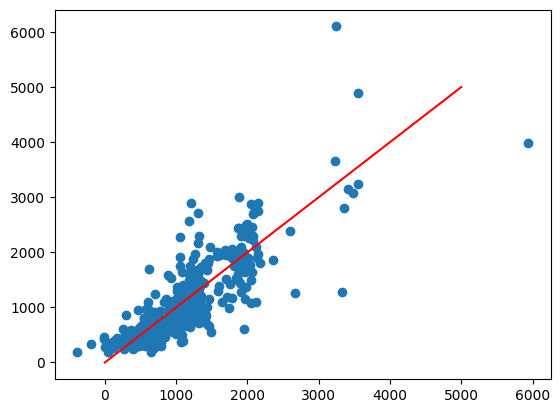

In [40]:
y_pred = lin_reg.predict(x_test)
plt.scatter(y_pred, y_test)
plt.plot(range(0, 5000), range(0,5000), c='red')

## Nonlinear Regression

Now, let's apply two different nonlinear regressions to the dataset.

### Polynomial Regression

Starting off with polynomial regression, we can use PolynomialFeatures from sklearn to preprocess the data to then pass into a LinearRegression.

In [41]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = polynomial_features.fit_transform(x_train)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_train_poly, y_train)

LinearRegression()

Display the coefficient of determination with using the training and testing data.

In [42]:
lin_reg_poly.score(x_train_poly, y_train)

0.7935136564934857

In [43]:
x_test_poly = polynomial_features.fit_transform(x_test)
lin_reg_poly.score(x_test_poly, y_test)

0.6892366284789773

#### Scatterplot

Let's display a scatter plot with the predictions using polynomial regression

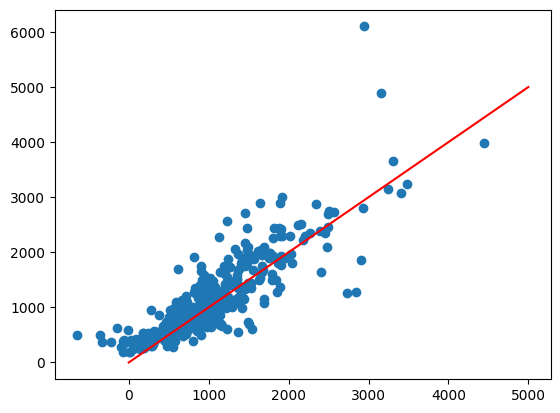

In [44]:
y_pred = lin_reg_poly.predict(x_test_poly)

plt.scatter(y_pred, y_test)
plt.plot(range(0, 5000), range(0,5000), c='red')

### RandomForestRegressor

Now, let's try RandomForestRegressor to perform nonlinear regression, which uses decision trees.

In [45]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.8238353733914368

#### Scatterplot

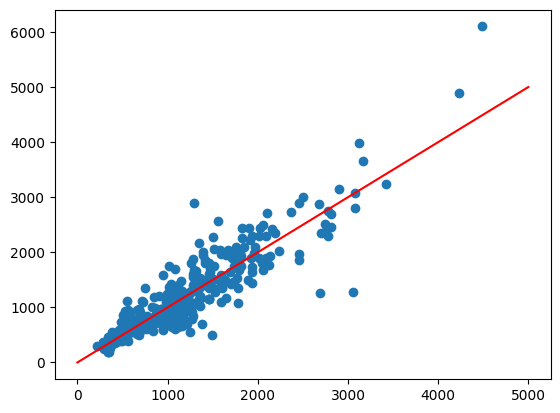

In [46]:
y_pred = random_forest.predict(x_test)

plt.scatter(y_pred, y_test)
plt.plot(range(0, 5000), range(0,5000), c='red')

## Resources
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://www.youtube.com/watch?v=wH_ezgftiy0

https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/

https://www.kaggle.com/code/ahmadmostafade/laptop-price-prediction

https://www.kaggle.com/code/mohamedanwar11/laptop-price-prediction-linear-regression/notebook#data-scaling 

https://commons.wikimedia.org/wiki/Laptop [Picture]